In [1]:
import os
import mahotas as mt
import cv2 as cv
import glob
import numpy as np
import csv
import re
import count_train
import count_test
import matplotlib.pyplot as plt
from scipy import stats

# Dataset

### A set of 202 diseased(1- algal leaf spot, 2- blister blight, 3- grey spot) and healthy(0) tea leaves are collected as dataset from High Field Tea Estate, Coonoor, Tamil Nadu, India.

## The Next Step is Image Segmentation.

#### A python script file is used for background removal and extraction of area of interest.

#### Image Augmentation is done to increase the dataset.

## The Next Step is the Feature Extraction. 

#### 13 Texture Features( Haralick features are used).
#### Color Features
#### Shape Features

In [2]:
def extract_feature(image):
	
	##Color Feature
	(mean,std) = cv.meanStdDev(image)
	
	#print(len(mean), type(mean))
	
	#print(len(std), type(std))
	
	color_feature = np.array(mean)
	
	color_feature = np.concatenate([color_feature,std]).flatten()
	
	#print(len(color_feature))
	
	##Texture Feature
	gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
	
	textures = mt.features.haralick(gray)
	
	ht_mean = textures.mean(axis = 0)
	
	#print(len(ht_mean), type(ht_mean))
	
	
	## Shape Features
	ret,thresh = cv.threshold(gray,127,255,0)
	
	x,contours, hierarchy =   cv.findContours(thresh.copy(),1,2)
	
	cnt = contours[0]
	
	area = cv.contourArea(cnt)
	#print(type(area))
	
	perimeter = cv.arcLength(cnt,True)
	#print(type(perimeter))
	
	shape = np.array([])
	shape = np.append(shape,area)
	shape = np.append(shape,perimeter)
	#print(len(shape))
	
	
	print(len(ht_mean) + len(std) + len(mean) + len(shape))
	
	ht_mean = np.concatenate([ht_mean,color_feature]).flatten()
	
	ht_mean = np.concatenate([ht_mean,shape]).flatten()
	
	print(len(ht_mean),ht_mean.shape)
	
	return(ht_mean)

# Creating Comma-Seperating file

#### A CSV file, having 21 features (13 texture features, 6 color features and 2 shape featrures) and appropriate label(0- Healthy, 1- Algal Leaf Spot, 2- blister blight, 3- Grey Spot), is created.

In [3]:
def create_csv(pa):	
	if(pa == 'train'):
		files = count_train.images()
		path = '/home/ln-2/Desktop/Project/disease-final/train'
	else:
		files = count_test.images()
		path = '/home/ln-2/Desktop/Project/disease-final/test'

	mydata = [['energy','contrast','correlation','variance','inverse difference moment','sum average','sum variance','sum entropy','entropy','difference variance','difference entropy','info_corr',
			   'maximal_corr_coeff','mean_B','mean_G','mean_R','std_B','std_G','std_R','area','perimeter','label']]

	
	print(path)
	for file in files:	
		print(path+ file)
		image = cv.imread(path + '/' + file)
		#print(file)
		#gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
		#means = cv.mean(image)
		#print(len(means))
		#print(image.shape)
		dim = (512,512)
		r_img = cv.resize(image,dim)
		print(r_img.shape)
		feature = extract_feature(r_img)
		label = 0
		
		## Healthy leaf is labeled as 0.
		if(re.search('test[1-9]+',file)):
			label = 0
		else:
			## Algal leaf spot is labeled as 1.
			if(re.search('algal[1-9]+',file)):
				label = 1
			## Blister Blight is labeled as 2.	
			elif(re.search('blister[1-9]+',file)):
				label = 2
			## Grey Spot is labled as 3.	
			elif(re.search('grey[1-9]+',file)):
				label = 3
		
		feature = np.append(feature,label)
		print(len(feature))
		print()
		feature = feature.tolist()
		mydata.append(feature)

	myfile = open(pa+'.csv','w')
	with myfile:
        	writer = csv.writer(myfile)
        	writer.writerows(mydata)


In [4]:
create_csv('train')

1862
/home/ln-2/Desktop/Project/disease-final/train
/home/ln-2/Desktop/Project/disease-final/traintest637.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1498.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest174.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest313.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest876.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest743.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest398.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1667.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traingrey34.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest447.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest69.jpg
(512, 512,

21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1136.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1226.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1602.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1244.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest429.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1828.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest64.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest400.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest875.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest44.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest260.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/De

21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest394.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest403.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest515.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest85.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest414.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest297.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest869.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1466.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest678.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest794.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest819.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Deskt

21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest755.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest566.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest125.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest415.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1108.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest517.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1589.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest236.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1013.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1717.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1561.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/

21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1568.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest789.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/trainblister10.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest341.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest114.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/trainalgal39.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest962.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1659.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1467.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest156.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest316.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/

21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest308.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest468.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1460.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1234.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1297.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1483.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1356.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest971.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1756.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest357.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1583.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-

(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1067.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest571.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest886.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest713.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest257.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest284.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1200.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1023.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest459.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest315.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1248.jpg
(512, 512, 3)
21
21 (21,)
22

21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1142.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1006.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1268.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1562.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest890.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1780.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest633.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest216.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1798.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1201.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1625.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln

21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1685.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest127.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1494.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest928.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traingrey28.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/trainalgal38.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest994.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1761.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1753.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1477.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1813.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/

(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest697.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1714.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1647.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest851.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest601.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest813.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest951.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest914.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest670.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/trainalgal58.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest970.jpg
(512, 512, 3)
21
21 (21,)
22



21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1024.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1228.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest506.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1653.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest382.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1593.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest741.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1418.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1109.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest831.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1335.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-

21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest226.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1396.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1237.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest208.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1343.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest769.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest86.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest716.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest887.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest151.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traingrey50.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desk

21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1774.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest172.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest776.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest575.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest191.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest960.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest552.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1157.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1307.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1076.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1190.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/

21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1169.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest992.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1596.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest333.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1478.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1500.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest417.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1437.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest150.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1458.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest225.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2

(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest381.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest673.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1016.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest734.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1183.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traingrey20.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1021.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/trainblister14.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest823.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1563.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1114.jpg
(512, 512, 3)
21
21 (21,)


21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1064.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest35.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest526.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1199.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1795.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest535.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1569.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1660.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1390.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest546.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1085.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2

21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1673.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest857.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest929.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest177.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest372.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1065.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest676.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1074.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest389.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1095.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest790.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/D

21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest987.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest295.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1210.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1323.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1417.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest168.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest742.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1702.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest845.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest383.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1300.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/

21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest555.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1354.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1783.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest709.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest528.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traingrey45.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest659.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest6.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1334.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1225.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1649.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Des

(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest838.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traingrey42.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1106.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1680.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1392.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest684.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1365.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest15.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1651.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/traintest1124.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/trainalgal1.jpg
(512, 512, 3)
21
21 (21,)
22


In [5]:
create_csv('test')

118
/home/ln-2/Desktop/Project/disease-final/test
/home/ln-2/Desktop/Project/disease-final/testalgal22.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest1640.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest119.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testgrey1.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testgrey11.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest1223.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest957.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest1628.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testgrey41.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest1450.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest1266.jpg
(512, 512, 3)
21
21 (2

21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest1419.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest1258.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest1386.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest1704.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest1216.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testblister17.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testgrey56.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest1769.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest654.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest1719.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/Project/disease-final/testtest726.jpg
(512, 512, 3)
21
21 (21,)
22

/home/ln-2/Desktop/

## Importing Panda Library and matplotlib library

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
myfile = pd.read_csv('train.csv',sep=',')

In [8]:
myfile.head()

,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,...,maximal_corr_coeff,mean_B,mean_G,mean_R,std_B,std_G,std_R,area,perimeter,label
0,0.030158,199.684128,0.979328,4831.822712,0.370889,240.317971,19127.606719,7.329885,10.510277,0.000462,...,0.995933,30.229214,149.039322,96.878613,46.481974,82.611132,64.496761,2.0,5.656854,0.0
1,0.404433,53.612163,0.994288,4692.440002,0.750862,83.946212,18716.147846,3.930757,5.098740,0.001904,...,0.990154,39.052807,52.949215,21.130882,65.837942,81.733283,51.179915,0.0,0.000000,0.0
2,0.214517,91.753874,0.990419,4787.952919,0.608841,127.890807,19060.057801,5.309484,7.138367,0.001175,...,0.995160,46.987793,87.492199,23.585911,54.053327,92.154831,41.901940,2.0,5.656854,0.0
3,0.264462,70.453784,0.993650,5547.046891,0.715987,118.477812,22117.733782,4.992406,6.269899,0.001608,...,0.997528,63.761543,79.834648,16.526382,81.117143,97.135152,46.029935,2.0,5.656854,0.0
4,0.816997,29.531462,0.984987,983.260733,0.936171,16.793626,3903.511472,1.162007,1.446217,0.003915,...,0.848632,8.737453,11.750637,1.600243,33.021975,43.706347,10.871997,0.0,4.828427,0.0


In [9]:
myfile.tail()

,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,...,maximal_corr_coeff,mean_B,mean_G,mean_R,std_B,std_G,std_R,area,perimeter,label
1857,0.600017,31.891878,0.989126,1466.151091,0.842555,35.844680,5832.712486,2.475036,3.187111,0.002686,...,0.957606,18.106228,24.761002,4.249416,39.259281,52.444218,13.670498,0.0,0.000000,0.0
1858,0.052369,20.066240,0.986136,723.817872,0.565398,67.402160,2875.205249,6.205351,8.079562,0.001349,...,0.997578,38.293427,38.115753,23.007015,32.696359,29.857899,19.954715,3.5,9.414214,1.0
1859,0.150147,92.612277,0.994027,7752.614360,0.582394,190.691280,30917.845163,5.930033,7.768567,0.001096,...,0.997924,56.202976,113.059254,74.655701,71.585250,102.495946,71.355149,2.0,5.656854,0.0
1860,0.088502,100.323597,0.991295,5763.352954,0.557047,199.580877,22953.088218,6.448058,8.403321,0.001054,...,0.998729,56.236919,120.028797,75.749989,66.972561,89.705596,60.978766,0.0,2.000000,0.0
1861,0.803964,25.496210,0.993922,2096.815393,0.935087,25.664543,8361.765362,1.274404,1.556533,0.003282,...,0.876832,14.233849,17.171062,3.653725,51.178212,61.161377,21.249690,2.0,5.656854,0.0


In [10]:
myfile = myfile.dropna()

In [11]:
myfile[182:]

,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,...,maximal_corr_coeff,mean_B,mean_G,mean_R,std_B,std_G,std_R,area,perimeter,label
182,0.057682,165.304109,0.984464,5320.908960,0.454481,193.975723,21118.331730,7.124688,9.728479,0.000639,...,0.998525,100.478073,130.176594,29.600929,77.823017,91.414871,54.509216,0.0,0.000000,0.0
183,0.736753,75.988597,0.987171,2960.936361,0.899173,36.951590,11767.756847,1.723140,2.186363,0.003000,...,0.916023,8.883247,21.546677,15.929810,36.384719,62.041832,49.421732,2.0,5.656854,0.0
184,0.033355,145.529317,0.986958,5580.904550,0.407290,237.184653,22178.088883,7.531937,10.336350,0.000547,...,0.998755,29.639687,141.178707,107.262650,52.392861,85.004319,72.706353,2.0,5.656854,0.0
185,0.643606,34.968036,0.989288,1631.826956,0.883474,34.356653,6492.339789,2.175917,2.680487,0.003393,...,0.952458,18.667732,23.368637,4.314148,44.734773,54.619082,17.423092,0.0,0.000000,0.0
186,0.703705,35.634701,0.987993,1483.489052,0.896349,27.511360,5898.321505,1.888909,2.353627,0.003016,...,0.935715,14.102863,19.916443,1.398159,40.557150,55.849255,7.689203,0.0,0.000000,0.0
187,0.086206,100.482420,0.991276,5760.021669,0.546177,199.635604,22939.604257,6.481957,8.492140,0.001012,...,0.998666,56.275280,120.054729,75.768349,66.963452,89.688457,60.952521,2.0,5.656854,0.0
188,0.030742,160.852737,0.983044,4744.540548,0.405740,212.030584,18817.309455,7.539660,10.372041,0.000540,...,0.998674,109.603149,142.562397,32.025276,73.782546,85.369401,55.172596,4.0,28.828427,0.0
189,0.765937,32.805685,0.994651,3066.017563,0.921793,35.700489,12231.264565,1.531820,1.874584,0.003155,...,0.909005,3.573593,20.725231,17.483013,18.971784,64.143354,54.733879,11.0,12.485281,0.0
190,0.565217,49.163366,0.993119,3571.865526,0.854613,59.878485,14238.298737,2.794119,3.433885,0.002633,...,0.978661,7.310242,37.232643,23.976707,20.264884,73.765988,50.717546,92.0,52.627417,0.0
191,0.676943,41.265049,0.994875,4024.850619,0.870652,51.208853,16058.137429,2.121261,2.720491,0.002782,...,0.942201,14.241970,29.354244,22.330208,39.664285,72.386044,56.205312,0.5,7.414214,0.0


### Seperating the labels

In [12]:
train_data = myfile.iloc[:,:-1]

In [13]:
train_label = myfile.iloc[:,-1]

In [14]:
train_label = train_label.astype(int)

## Statistical Analysis

Text(0.5,1,'Correlation between features')

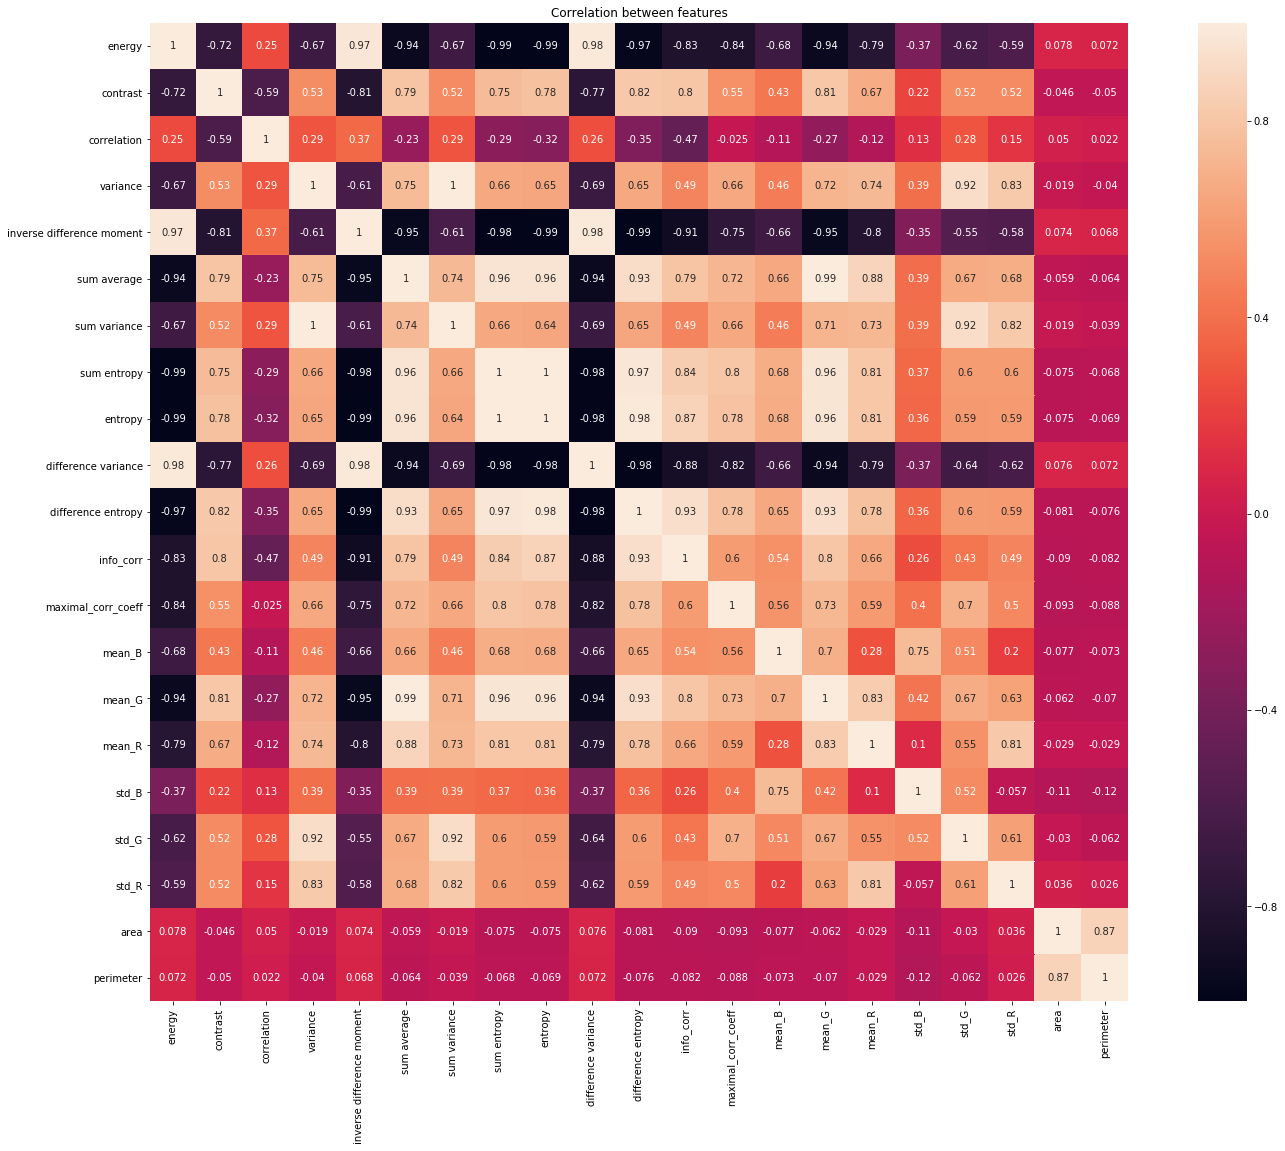

In [15]:
plt.figure(figsize=(25,18))
corr = train_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation between features")

In [16]:
from sklearn import preprocessing

In [17]:
standard = preprocessing.StandardScaler()

In [18]:
train_label.describe()

count    1862.000000
mean        0.129431
std         0.543541
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: label, dtype: float64

In [19]:
train_data['energy'].describe()

count    1862.000000
mean        0.441824
std         0.278105
min         0.004525
25%         0.141334
50%         0.562092
75%         0.672367
max         0.842096
Name: energy, dtype: float64

In [20]:
train_data['energy'] = (train_data['energy'] - train_data['energy'].min())/(train_data['energy'].max() - train_data['energy'].min()) 

/home/ln-2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
train_data['energy'].describe()

count    1862.000000
mean        0.522103
std         0.332037
min         0.000000
25%         0.163339
50%         0.665695
75%         0.797356
max         1.000000
Name: energy, dtype: float64

In [22]:
train_data['contrast'].describe()

count    1862.000000
mean       66.717668
std        39.741097
min        15.572684
25%        37.523159
50%        53.535228
75%        82.433457
max       216.376098
Name: contrast, dtype: float64

In [23]:
train_data['contrast'] = (train_data['contrast'] - train_data['contrast'].min())/(train_data['contrast'].max() - train_data['contrast'].min())

/home/ln-2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
train_data['contrast'].describe()

count    1862.000000
mean        0.254702
std         0.197910
min         0.000000
25%         0.109313
50%         0.189053
75%         0.332966
max         1.000000
Name: contrast, dtype: float64

In [25]:
train_data['correlation'].describe()

count    1862.000000
mean        0.990471
std         0.004203
min         0.973726
25%         0.988340
50%         0.991228
75%         0.993541
max         0.998267
Name: correlation, dtype: float64

In [26]:
train_data = train_data.drop('correlation', 1)

In [27]:
train_data['variance'].describe()

count     1862.000000
mean      3713.320105
std       1684.671185
min        723.765969
25%       2532.303574
50%       3462.662835
75%       4719.621875
max      10236.008787
Name: variance, dtype: float64

In [28]:
train_data['variance'] = (train_data['variance'] - train_data['variance'].min())/(train_data['variance'].max() - train_data['variance'].min())

In [29]:
train_data['variance'].describe()

count    1862.000000
mean        0.314285
std         0.177106
min         0.000000
25%         0.190127
50%         0.287934
75%         0.420075
max         1.000000
Name: variance, dtype: float64

In [30]:
train_data['inverse difference moment'].describe()

count    1862.000000
mean        0.744383
std         0.177637
min         0.295636
25%         0.580672
50%         0.842983
75%         0.883972
max         0.943054
Name: inverse difference moment, dtype: float64

In [31]:
train_data['inverse difference moment'] = (train_data['inverse difference moment'] - train_data['inverse difference moment'].min())/(train_data['inverse difference moment'].max() - train_data['inverse difference moment'].min())

In [32]:
train_data['inverse difference moment'].describe()

count    1862.000000
mean        0.693133
std         0.274378
min         0.000000
25%         0.440266
50%         0.845431
75%         0.908742
max         1.000000
Name: inverse difference moment, dtype: float64

In [33]:
train_data['sum average'].describe()

count    1862.000000
mean       96.292828
std        72.676450
min        16.737848
25%        40.239568
50%        58.630273
75%       147.898145
max       286.639831
Name: sum average, dtype: float64

In [34]:
train_data['sum average'] = (train_data['sum average'] - train_data['sum average'].min())/(train_data['sum average'].max() - train_data['sum average'].min())

In [35]:
train_data['sum average'].describe()

count    1862.000000
mean        0.294755
std         0.269270
min         0.000000
25%         0.087075
50%         0.155213
75%         0.485955
max         1.000000
Name: sum average, dtype: float64

In [36]:
train_data['sum variance'].describe()

count     1862.000000
mean     14786.562753
std       6717.744748
min       2875.027328
25%      10077.788332
50%      13770.934573
75%      18731.876122
max      40837.009914
Name: sum variance, dtype: float64

In [37]:
train_data['sum variance'] = (train_data['sum variance'] - train_data['sum variance'].min())/(train_data['sum variance'].max() - train_data['sum variance'].min())

In [38]:
train_data['sum variance'].describe()

count    1862.000000
mean        0.313775
std         0.176960
min         0.000000
25%         0.189736
50%         0.287022
75%         0.417703
max         1.000000
Name: sum variance, dtype: float64

In [39]:
train_data['sum entropy'].describe()

count    1862.000000
mean        3.837692
std         2.159631
min         1.065154
25%         2.104915
50%         2.787372
75%         5.930051
max         8.098256
Name: sum entropy, dtype: float64

In [40]:
train_data['sum entropy'] = (train_data['sum entropy'] - train_data['sum entropy'].min())/(train_data['sum entropy'].max() - train_data['sum entropy'].min())

In [41]:
train_data['sum entropy'].describe()

count    1862.000000
mean        0.394213
std         0.307067
min         0.000000
25%         0.147838
50%         0.244873
75%         0.691714
max         1.000000
Name: sum entropy, dtype: float64

In [42]:
train_data['entropy'].describe()

count    1862.000000
mean        5.007126
std         2.988247
min         1.319677
25%         2.632814
50%         3.437259
75%         7.782768
max        11.603657
Name: entropy, dtype: float64

In [43]:
train_data['entropy'] = (train_data['entropy'] - train_data['entropy'].min())/(train_data['entropy'].max() - train_data['entropy'].min())

In [44]:
train_data['entropy'].describe()

count    1862.000000
mean        0.358562
std         0.290573
min         0.000000
25%         0.127688
50%         0.205911
75%         0.628462
max         1.000000
Name: entropy, dtype: float64

In [45]:
train_data['difference variance'].describe()

count    1862.000000
mean        0.002128
std         0.000976
min         0.000354
25%         0.001105
50%         0.002544
75%         0.002913
max         0.003915
Name: difference variance, dtype: float64

In [46]:
train_data['difference variance'] = (train_data['difference variance'] - train_data['difference variance'].min())/(train_data['difference variance'].max() - train_data['difference variance'].min())

In [47]:
train_data['difference variance'].describe()

count    1862.000000
mean        0.498293
std         0.274082
min         0.000000
25%         0.210850
50%         0.615104
75%         0.718640
max         1.000000
Name: difference variance, dtype: float64

In [48]:
train_data['difference entropy'].describe()

count    1862.000000
mean        1.856693
std         0.927954
min         0.639086
25%         1.114029
50%         1.413631
75%         2.644022
max         4.178119
Name: difference entropy, dtype: float64

In [49]:
train_data['difference entropy'] = (train_data['difference entropy'] - train_data['difference entropy'].min())/(train_data['difference entropy'].max() - train_data['difference entropy'].min())

In [50]:
train_data['difference entropy'].describe()

count    1862.000000
mean        0.344051
std         0.262206
min         0.000000
25%         0.134201
50%         0.218858
75%         0.566521
max         1.000000
Name: difference entropy, dtype: float64

In [51]:
train_data['info_corr'].describe()

count    1862.000000
mean       -0.567142
std         0.068089
min        -0.673205
25%        -0.615781
50%        -0.592166
75%        -0.524194
max        -0.370919
Name: info_corr, dtype: float64

In [52]:
train_data = train_data.drop('info_corr', 1)

In [53]:
train_data['maximal_corr_coeff'].describe()

count    1862.000000
mean        0.965106
std         0.037165
min         0.834630
25%         0.944197
50%         0.975240
75%         0.997543
max         0.999605
Name: maximal_corr_coeff, dtype: float64

In [54]:
train_data = train_data.drop('maximal_corr_coeff', 1)

In [55]:
train_data['mean_B'].describe()

count    1862.000000
mean       29.868286
std        25.763010
min         0.906940
25%        13.134147
50%        22.986050
75%        37.081604
max       130.789696
Name: mean_B, dtype: float64

In [56]:
train_data['mean_B'] = (train_data['mean_B'] - train_data['mean_B'].min())/(train_data['mean_B'].max() - train_data['mean_B'].min())

In [57]:
train_data['mean_B'].describe()

count    1862.000000
mean        0.222981
std         0.198356
min         0.000000
25%         0.094140
50%         0.169993
75%         0.278518
max         1.000000
Name: mean_B, dtype: float64

In [58]:
train_data['mean_G'].describe()

count    1862.000000
mean       60.275188
std        44.565335
min        11.157841
25%        26.286657
50%        37.845594
75%        93.609468
max       168.683567
Name: mean_G, dtype: float64

In [59]:
train_data['mean_G'] = (train_data['mean_G'] - train_data['mean_G'].min())/(train_data['mean_G'].max() - train_data['mean_G'].min())

In [60]:
train_data['mean_G'].describe()

count    1862.000000
mean        0.311805
std         0.282908
min         0.000000
25%         0.096040
50%         0.169418
75%         0.523417
max         1.000000
Name: mean_G, dtype: float64

In [61]:
train_data['mean_R'].describe()

count    1862.000000
mean       30.876310
std        31.502169
min         0.971321
25%         7.165782
50%        17.482208
75%        47.402072
max       130.822411
Name: mean_R, dtype: float64

In [62]:
train_data['mean_R'] = (train_data['mean_R'] - train_data['mean_R'].min())/(train_data['mean_R'].max() - train_data['mean_R'].min())

In [63]:
train_data['mean_R'].describe()

count    1862.000000
mean        0.230302
std         0.242602
min         0.000000
25%         0.047704
50%         0.127152
75%         0.357569
max         1.000000
Name: mean_R, dtype: float64

In [64]:
train_data['std_B'].describe()

count    1862.000000
mean       47.623166
std        18.519201
min         5.822116
25%        34.660536
50%        48.981488
75%        61.245257
max        99.473150
Name: std_B, dtype: float64

In [65]:
train_data['std_B'] = (train_data['std_B'] - train_data['std_B'].min())/(train_data['std_B'].max() - train_data['std_B'].min())

In [66]:
train_data['std_B'].describe()

count    1862.000000
mean        0.446349
std         0.197747
min         0.000000
25%         0.307935
50%         0.460853
75%         0.591805
max         1.000000
Name: std_B, dtype: float64

In [67]:
train_data['std_G'].describe()

count    1862.000000
mean       73.499440
std        14.952400
min        29.857774
25%        64.142652
50%        73.035925
75%        85.004471
max       117.608446
Name: std_G, dtype: float64

In [68]:
train_data['std_G'] = (train_data['std_G'] - train_data['std_G'].min())/(train_data['std_G'].max() - train_data['std_G'].min())

In [69]:
train_data['std_G'].describe()

count    1862.000000
mean        0.497337
std         0.170396
min         0.000000
25%         0.390708
50%         0.492055
75%         0.628448
max         1.000000
Name: std_G, dtype: float64

In [70]:
train_data['std_R'].describe()

count    1862.000000
mean       43.004281
std        21.128314
min         6.020603
25%        23.264045
50%        43.838994
75%        60.373682
max        99.453988
Name: std_R, dtype: float64

In [71]:
train_data['std_R'] = (train_data['std_R'] - train_data['std_R'].min())/(train_data['std_R'].max() - train_data['std_R'].min())

In [72]:
train_data['std_R'].describe()

count    1862.000000
mean        0.395829
std         0.226132
min         0.000000
25%         0.184553
50%         0.404763
75%         0.581731
max         1.000000
Name: std_R, dtype: float64

In [73]:
train_data['area'].describe()

count     1862.000000
mean       160.959452
std       1909.311149
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max      33683.000000
Name: area, dtype: float64

In [74]:
train_data = train_data.drop('area', 1)

In [75]:
train_data['perimeter'].describe()

count    1862.000000
mean       16.299888
std        73.606268
min         0.000000
25%         3.414214
50%         5.656854
75%         9.414214
max      1119.467158
Name: perimeter, dtype: float64

In [76]:
train_data = train_data.drop('perimeter', 1)

In [77]:
train_data = train_data.drop('entropy', 1)

In [78]:
train_data.head()

,energy,contrast,variance,inverse difference moment,sum average,sum variance,sum entropy,difference variance,difference entropy,mean_B,mean_G,mean_R,std_B,std_G,std_R
0,0.030604,0.916874,0.431870,0.116235,0.828375,0.428128,0.890749,0.030462,0.915746,0.225760,0.875295,0.738594,0.434163,0.601173,0.625859
1,0.477461,0.189436,0.417217,0.703140,0.249010,0.417289,0.407445,0.435196,0.404736,0.293695,0.265299,0.155251,0.640845,0.591169,0.483332
2,0.250715,0.379382,0.427259,0.483776,0.411827,0.426348,0.603479,0.230652,0.602596,0.354788,0.484583,0.174158,0.515010,0.709933,0.384031
3,0.310346,0.273308,0.507060,0.649274,0.376952,0.506894,0.558395,0.352270,0.422965,0.483933,0.435972,0.119792,0.803996,0.766688,0.428212
4,0.970033,0.069515,0.027280,0.989368,0.000207,0.027092,0.013771,0.999982,0.019426,0.060289,0.003763,0.004843,0.290438,0.157817,0.051924


Text(0.5,1,'Correlation between features')

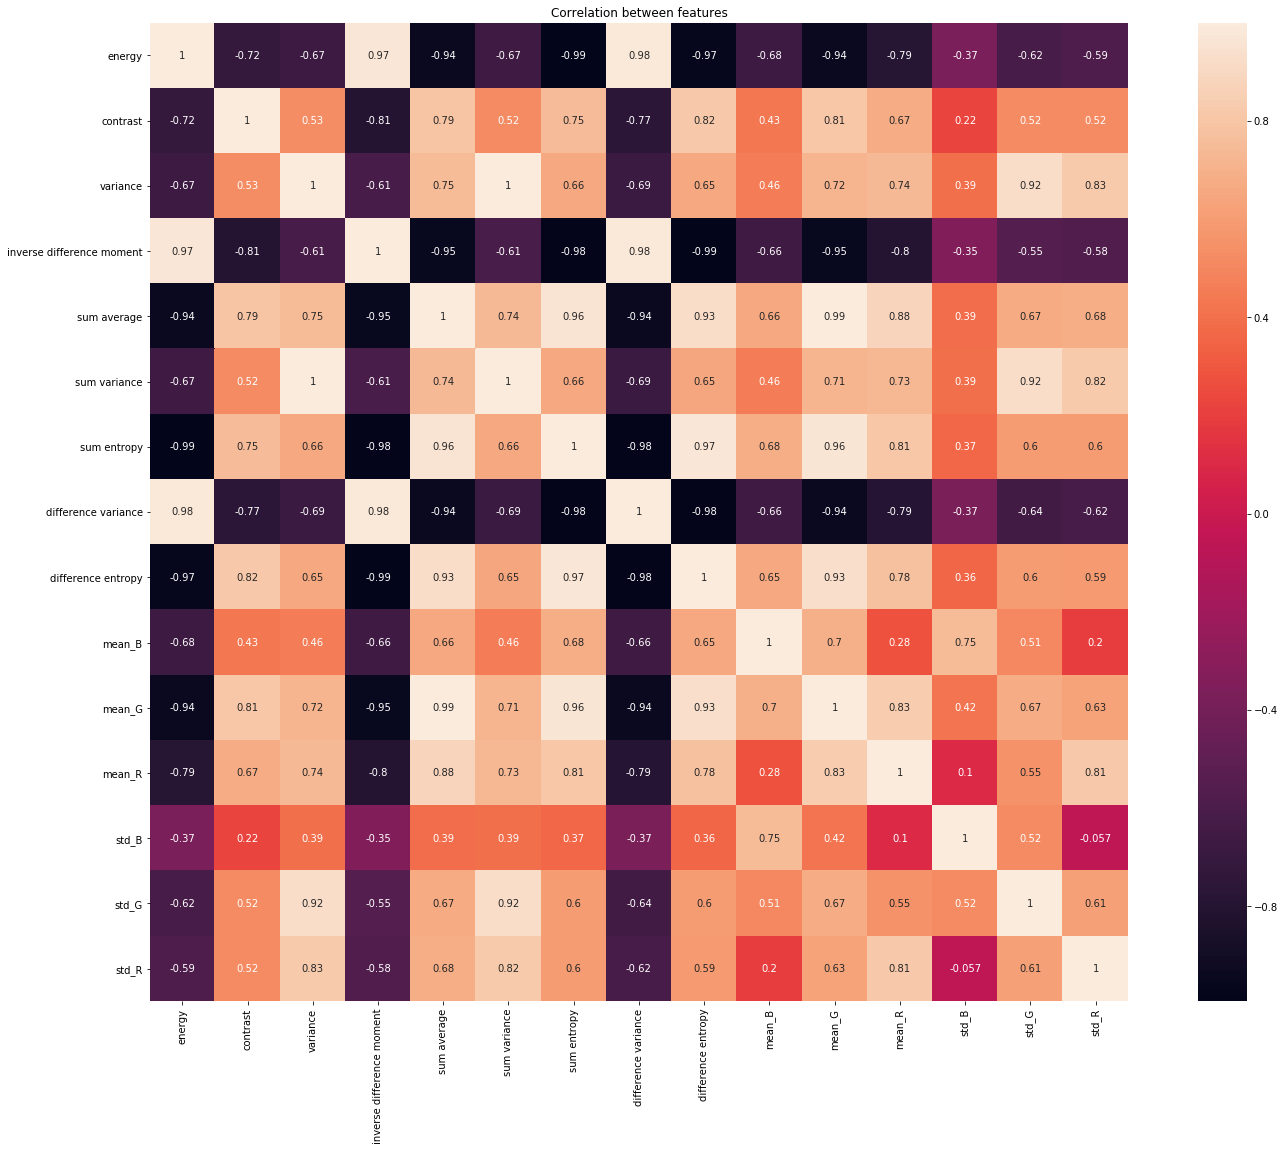

In [79]:
plt.figure(figsize=(25, 18))
corr = train_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation between features")

In [459]:
train_data = train_data.drop('sum variance', 1)

### Statistical Analysis of Test dataset

In [80]:
test = pd.read_csv('test.csv')

In [81]:
test.head()

,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,...,maximal_corr_coeff,mean_B,mean_G,mean_R,std_B,std_G,std_R,area,perimeter,label
0,0.027614,75.876049,0.989063,3470.442224,0.374566,188.172519,13805.892846,7.185458,10.225069,0.000508,...,0.995927,110.672779,120.317806,35.355999,70.883012,76.101307,31.148942,2.0,5.656854,1.0
1,0.608491,69.903593,0.985977,2491.946158,0.861429,45.117940,9897.881040,2.470234,3.084804,0.002641,...,0.966300,21.281883,31.361919,5.540855,48.681124,68.800080,20.708447,0.0,6.000000,0.0
2,0.512548,66.226205,0.990938,3653.219553,0.805368,63.610339,14546.652007,3.228891,4.136742,0.002263,...,0.981659,10.598244,37.527039,28.357140,32.558882,69.544082,56.139926,0.0,0.000000,0.0
3,0.230444,17.921189,0.998089,4689.407004,0.694295,115.985669,18739.706827,5.182141,6.533303,0.001793,...,0.997730,36.701908,62.436031,56.834671,47.290582,72.909797,69.646261,3.5,10.242641,3.0
4,0.229951,17.981037,0.998083,4688.737827,0.691309,115.960983,18736.970269,5.188013,6.549149,0.001766,...,0.997680,36.690567,62.424496,56.823151,47.277482,72.905802,69.640293,2.0,5.656854,3.0


#### Seperating the labels

In [82]:
test_data = test.iloc[:,:-1]
test_label = test.iloc[:,-1]
test_label = test_label.astype(int)

Text(0.5,1,'Correlation between features')

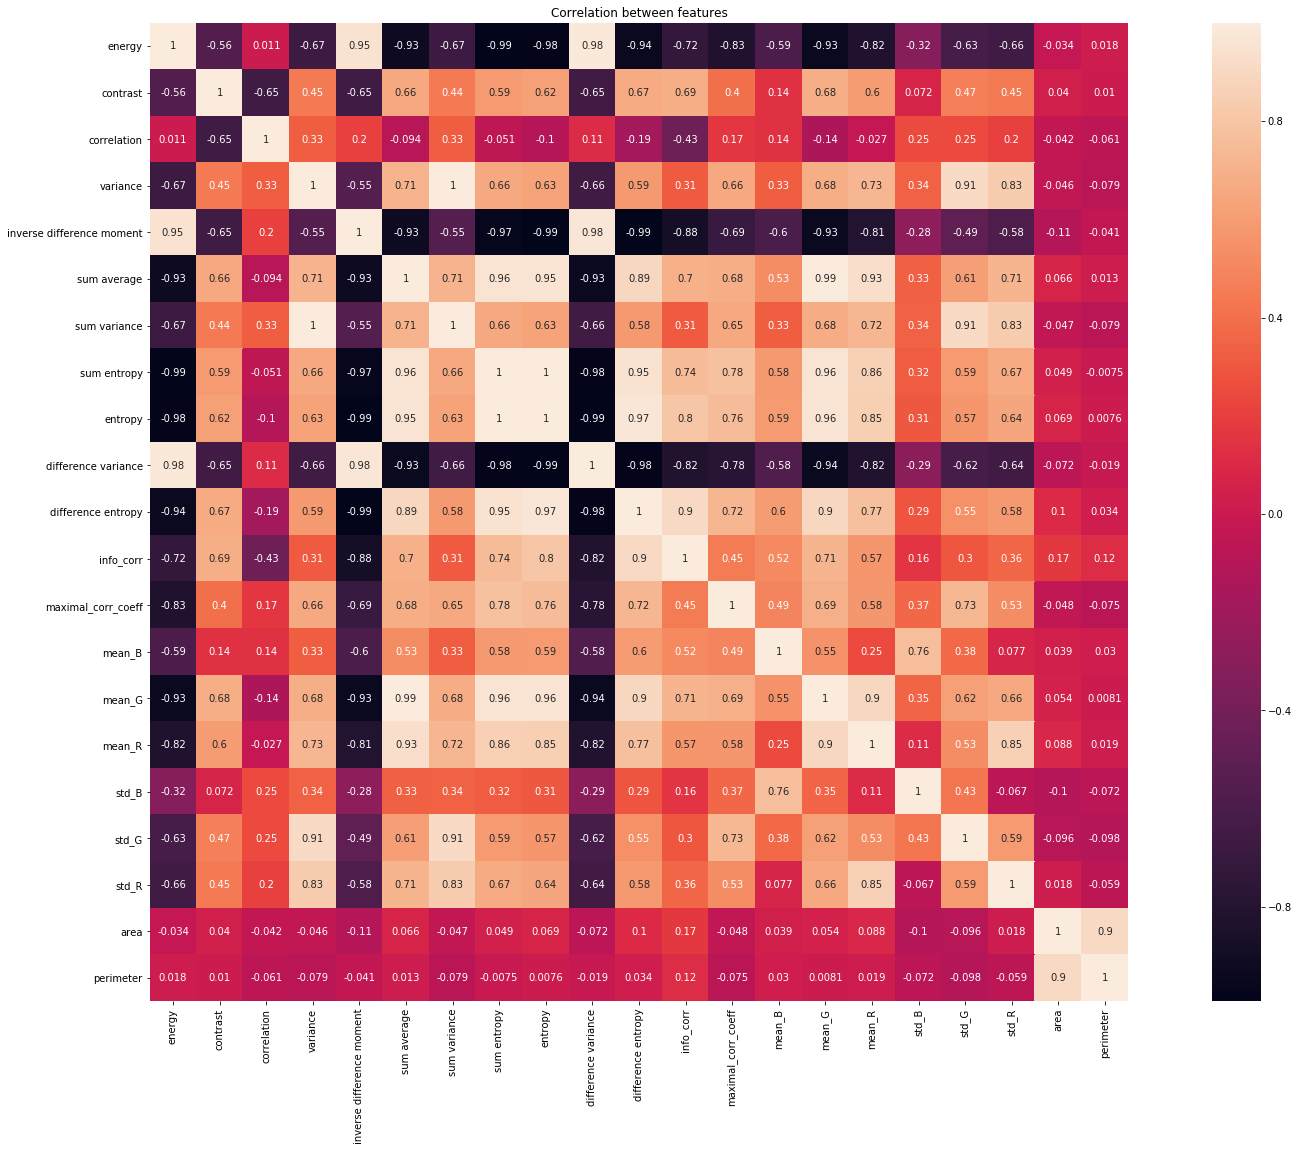

In [83]:
plt.figure(figsize=(30,18))
corr = test_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation between features")

In [84]:
test_label.describe()

count    118.000000
mean       0.398305
std        0.907140
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: label, dtype: float64

In [85]:
test_data['energy'].describe()

count    118.000000
mean       0.339060
std        0.273640
min        0.004658
25%        0.082903
50%        0.229822
75%        0.605559
max        0.845630
Name: energy, dtype: float64

In [86]:
test_data['energy'] = (test_data['energy'] - test_data['energy'].min())/(test_data['energy'].max() - test_data['energy'].min()) 

/home/ln-2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
test_data['energy'].describe()

count    118.000000
mean       0.397638
std        0.325385
min        0.000000
25%        0.093041
50%        0.267742
75%        0.714531
max        1.000000
Name: energy, dtype: float64

In [88]:
test_data['contrast'].describe()

count    118.000000
mean      67.665986
std       37.091444
min       17.425366
25%       39.520439
50%       66.127212
75%       85.572513
max      203.193771
Name: contrast, dtype: float64

In [89]:
test_data['contrast'] = (test_data['contrast'] - test_data['contrast'].min())/(test_data['contrast'].max() - test_data['contrast'].min())

/home/ln-2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
train_data['contrast'].describe()

count    1862.000000
mean        0.254702
std         0.197910
min         0.000000
25%         0.109313
50%         0.189053
75%         0.332966
max         1.000000
Name: contrast, dtype: float64

In [91]:
test_data['correlation'].describe()

count    118.000000
mean       0.991365
std        0.003809
min        0.977761
25%        0.988973
50%        0.990939
75%        0.993918
max        0.998248
Name: correlation, dtype: float64

In [92]:
test_data = test_data.drop('correlation', 1)

In [93]:
test_data['variance'].describe()

count     118.000000
mean     4164.166166
std      1728.339812
min      1099.980954
25%      3068.302447
50%      3935.907409
75%      4783.725219
max      8496.656608
Name: variance, dtype: float64

In [94]:
test_data['variance'] = (test_data['variance'] - test_data['variance'].min())/(test_data['variance'].max() - test_data['variance'].min())

In [95]:
test_data['variance'].describe()

count    118.000000
mean       0.414265
std        0.233664
min        0.000000
25%        0.266109
50%        0.383406
75%        0.498027
max        1.000000
Name: variance, dtype: float64

In [96]:
test_data['inverse difference moment'].describe()

count    118.000000
mean       0.688550
std        0.181322
min        0.301643
25%        0.547234
50%        0.689211
75%        0.858142
max        0.943683
Name: inverse difference moment, dtype: float64

In [97]:
test_data['inverse difference moment'] = (test_data['inverse difference moment'] - test_data['inverse difference moment'].min())/(test_data['inverse difference moment'].max() - test_data['inverse difference moment'].min())

In [98]:
test_data['inverse difference moment'].describe()

count    118.000000
mean       0.602621
std        0.282415
min        0.000000
25%        0.382517
50%        0.603651
75%        0.866767
max        1.000000
Name: inverse difference moment, dtype: float64

In [99]:
test_data['sum average'].describe()

count    118.000000
mean     122.238052
std       77.812116
min       16.780254
25%       53.961482
50%      108.545257
75%      188.491082
max      286.602722
Name: sum average, dtype: float64

In [100]:
test_data['sum average'] = (test_data['sum average'] - test_data['sum average'].min())/(test_data['sum average'].max() - test_data['sum average'].min())

In [101]:
test_data['sum average'].describe()

count    118.000000
mean       0.390841
std        0.288383
min        0.000000
25%        0.137799
50%        0.340094
75%        0.636384
max        1.000000
Name: sum average, dtype: float64

In [102]:
test_data['sum variance'].describe()

count      118.000000
mean     16588.998679
std       6896.901102
min       4377.677228
25%      12204.342539
50%      15666.160500
75%      19044.711148
max      33912.852267
Name: sum variance, dtype: float64

In [103]:
test_data['sum variance'] = (test_data['sum variance'] - test_data['sum variance'].min())/(test_data['sum variance'].max() - test_data['sum variance'].min())

In [104]:
test_data['sum variance'].describe()

count    118.000000
mean       0.413450
std        0.233515
min        0.000000
25%        0.264995
50%        0.382205
75%        0.496595
max        1.000000
Name: sum variance, dtype: float64

In [105]:
test_data['sum entropy'].describe()

count    118.000000
mean       4.621923
std        2.165105
min        1.044182
25%        2.483300
50%        5.187230
75%        6.722680
max        8.082018
Name: sum entropy, dtype: float64

In [106]:
test_data['sum entropy'] = (test_data['sum entropy'] - test_data['sum entropy'].min())/(test_data['sum entropy'].max() - test_data['sum entropy'].min())

In [107]:
test_data['sum entropy'].describe()

count    118.000000
mean       0.508358
std        0.307638
min        0.000000
25%        0.204483
50%        0.588682
75%        0.806853
max        1.000000
Name: sum entropy, dtype: float64

In [108]:
test_data = test_data.drop('entropy', 1)

In [109]:
test_data['difference variance'].describe()

count    118.000000
mean       0.001812
std        0.000944
min        0.000363
25%        0.000992
50%        0.001800
75%        0.002676
max        0.003717
Name: difference variance, dtype: float64

In [110]:
test_data['difference variance'] = (test_data['difference variance'] - test_data['difference variance'].min())/(test_data['difference variance'].max() - test_data['difference variance'].min())

In [111]:
test_data['difference variance'].describe()

count    118.000000
mean       0.432069
std        0.281545
min        0.000000
25%        0.187460
50%        0.428411
75%        0.689652
max        1.000000
Name: difference variance, dtype: float64

In [112]:
test_data['difference entropy'] = (test_data['difference entropy'] - test_data['difference entropy'].min())/(test_data['difference entropy'].max() - test_data['difference entropy'].min())

In [113]:
test_data['difference entropy'].describe()

count    118.000000
mean       0.428013
std        0.262776
min        0.000000
25%        0.187021
50%        0.444207
75%        0.615154
max        1.000000
Name: difference entropy, dtype: float64

In [114]:
test_data['info_corr'].describe()

count    118.000000
mean      -0.553339
std        0.073120
min       -0.669027
25%       -0.605815
50%       -0.578648
75%       -0.518089
max       -0.372573
Name: info_corr, dtype: float64

In [115]:
test_data = test_data.drop('info_corr', 1)

In [116]:
test_data['maximal_corr_coeff'].describe()

count    118.000000
mean       0.975890
std        0.036069
min        0.831003
25%        0.966507
50%        0.995843
75%        0.998288
max        0.999556
Name: maximal_corr_coeff, dtype: float64

In [117]:
test_data = test_data.drop('maximal_corr_coeff', 1)

In [118]:
test_data['mean_B'].describe()

count    118.000000
mean      34.328298
std       25.669559
min        1.270267
25%       15.447361
50%       28.124659
75%       49.704570
max      110.687748
Name: mean_B, dtype: float64

In [119]:
test_data['mean_B'] = (test_data['mean_B'] - test_data['mean_B'].min())/(test_data['mean_B'].max() - test_data['mean_B'].min())

In [120]:
test_data['mean_B'].describe()

count    118.000000
mean       0.302128
std        0.234602
min        0.000000
25%        0.129569
50%        0.245431
75%        0.442656
max        1.000000
Name: mean_B, dtype: float64

In [121]:
test_data['mean_G'].describe()

count    118.000000
mean      74.281909
std       45.497898
min       11.152794
25%       33.172728
50%       62.449104
75%      118.861082
max      168.683632
Name: mean_G, dtype: float64

In [122]:
test_data['mean_G'] = (test_data['mean_G'] - test_data['mean_G'].min())/(test_data['mean_G'].max() - test_data['mean_G'].min())

In [123]:
test_data['mean_G'].describe()

count    118.000000
mean       0.400741
std        0.288819
min        0.000000
25%        0.139782
50%        0.325627
75%        0.683728
max        1.000000
Name: mean_G, dtype: float64

In [124]:
test_data['mean_R'].describe()

count    118.000000
mean      44.949921
std       38.435234
min        1.257195
25%       10.230754
50%       35.376165
75%       74.641022
max      130.822586
Name: mean_R, dtype: float64

In [125]:
test_data['mean_R'] = (test_data['mean_R'] - test_data['mean_R'].min())/(test_data['mean_R'].max() - test_data['mean_R'].min())

In [126]:
test_data['mean_R'].describe()

count    118.000000
mean       0.337225
std        0.296647
min        0.000000
25%        0.069259
50%        0.263334
75%        0.566384
max        1.000000
Name: mean_R, dtype: float64

In [127]:
test_data['std_B'].describe()

count    118.000000
mean      50.502167
std       19.239411
min        7.483886
25%       36.859012
50%       51.946276
75%       67.880243
max       82.456170
Name: std_B, dtype: float64

In [128]:
test_data['std_B'] = (test_data['std_B'] - test_data['std_B'].min())/(test_data['std_B'].max() - test_data['std_B'].min())

In [129]:
test_data['std_B'].describe()

count    118.000000
mean       0.573789
std        0.256620
min        0.000000
25%        0.391813
50%        0.593051
75%        0.805582
max        1.000000
Name: std_B, dtype: float64

In [130]:
test_data['std_G'].describe()

count    118.000000
mean      76.525801
std       13.599252
min       42.657145
25%       69.660022
50%       74.771510
75%       86.508917
max      108.224816
Name: std_G, dtype: float64

In [131]:
test_data['std_G'] = (test_data['std_G'] - test_data['std_G'].min())/(test_data['std_G'].max() - test_data['std_G'].min())

In [132]:
test_data['std_G'].describe()

count    118.000000
mean       0.516545
std        0.207408
min        0.000000
25%        0.411832
50%        0.489790
75%        0.668802
max        1.000000
Name: std_G, dtype: float64

In [133]:
test_data['std_R'].describe()

count    118.000000
mean      48.336560
std       22.305336
min        6.661626
25%       29.646018
50%       47.434758
75%       69.641106
max       90.996639
Name: std_R, dtype: float64

In [134]:
test_data['std_R'] = (test_data['std_R'] - test_data['std_R'].min())/(test_data['std_R'].max() - test_data['std_R'].min())

In [135]:
test_data['std_R'].describe()

count    118.000000
mean       0.494159
std        0.264485
min        0.000000
25%        0.272537
50%        0.483466
75%        0.746777
max        1.000000
Name: std_R, dtype: float64

In [136]:
test_data['area'].describe()

count    118.000000
mean      12.817797
std       43.959269
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max      299.000000
Name: area, dtype: float64

In [137]:
test_data = test_data.drop('area', 1)


In [138]:
test_data['perimeter'].describe()

count    118.000000
mean      10.205895
std       18.118530
min        0.000000
25%        2.000000
50%        5.656854
75%        9.071068
max      113.254833
Name: perimeter, dtype: float64

In [139]:
test_data = test_data.drop('perimeter', 1)

In [140]:
test_data.head()

,energy,contrast,variance,inverse difference moment,sum average,sum variance,sum entropy,difference variance,difference entropy,mean_B,mean_G,mean_R,std_B,std_G,std_R
0,0.027297,0.314643,0.320477,0.113581,0.635204,0.319220,0.872609,0.043422,0.881784,0.999863,0.692976,0.263178,0.845634,0.510071,0.290358
1,0.718017,0.282493,0.188188,0.871887,0.105023,0.186903,0.202626,0.679127,0.184519,0.182892,0.128287,0.033062,0.549500,0.398717,0.166560
2,0.603932,0.262697,0.345187,0.784570,0.173559,0.344300,0.310423,0.566533,0.301134,0.085251,0.167423,0.209160,0.334457,0.410064,0.586688
3,0.268482,0.002669,0.485276,0.611570,0.367669,0.486269,0.587959,0.426335,0.435516,0.323821,0.325544,0.428953,0.530952,0.461396,0.746839
4,0.267895,0.002991,0.485185,0.606919,0.367578,0.486176,0.588793,0.418508,0.439441,0.323717,0.325471,0.428864,0.530777,0.461335,0.746768


In [141]:
test_label.head()

0    1
1    0
2    0
3    3
4    3
Name: label, dtype: int64

Text(0.5,1,'Correlation between features')

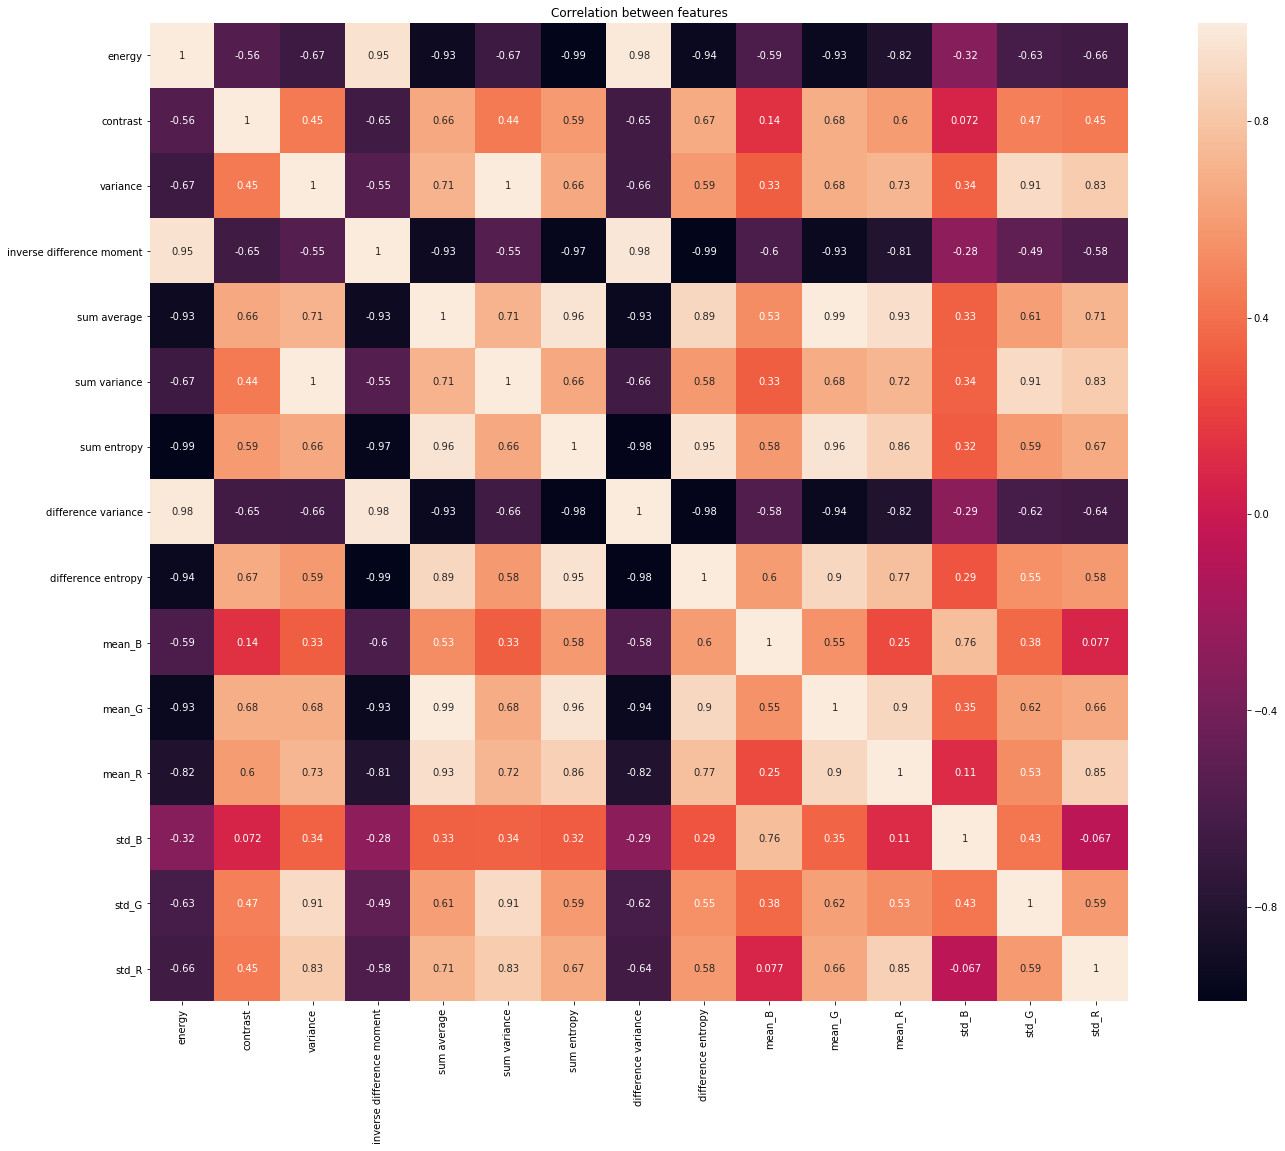

In [142]:
plt.figure(figsize=(25, 18))
corr = test_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation between features")

In [460]:
test_data = test_data.drop('sum variance', 1)

### Next Step is the model Selection

#### Training 

#### Evaluation

#### Hyperparameter Tuning



####  Support Vector machine works well for multiclass classification.

In [143]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#### SVC model 

In [144]:
model = svm.SVC()

## Training of dataset

In [145]:
model.fit(train_data,train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Testing of the trained model

In [146]:
predict_label = model.predict(test_data)

### Evaluation of the trained model 

In [147]:
accuracy = accuracy_score(test_label,predict_label)

In [148]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 80.51



## Hyper-Parameter Tuning

#### Regularization parameter C - high C value implies strict classification.

#### Gamma parameter - high gamma parameter value implies only nearby points (support vector) are considered for classification.

#### Kernel - Radial Basis Kernel(rbf) , linear kernel are popular choices.

In [149]:
model = svm.SVC(kernel = 'linear')

In [150]:
model.fit(train_data,train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [151]:
predict_label = model.predict(test_data)

In [152]:
accuracy = accuracy_score(test_label,predict_label)

In [153]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 93.22


### Case 2

In [154]:
model = svm.SVC(kernel = 'linear',C=10,gamma = 1)

In [155]:
model.fit(train_data,train_label)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [156]:
predict_label = model.predict(test_data)

In [157]:
accuracy = accuracy_score(test_label,predict_label)

In [158]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.46


### Case 3

In [159]:
model = svm.SVC(kernel = 'linear',C=10,gamma = 2)

In [160]:
model.fit(train_data,train_label)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [161]:
predict_label = model.predict(test_data)

In [162]:
accuracy = accuracy_score(test_label,predict_label)

In [163]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.46


### Case 4

In [164]:
model = svm.SVC(kernel = 'linear',C=10,gamma = 0.02)

In [165]:
model.fit(train_data,train_label)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.02, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [166]:
predict_label = model.predict(test_data)

In [167]:
accuracy = accuracy_score(test_label,predict_label)

In [168]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.46


#### Case 5

In [169]:
model = svm.SVC(kernel = 'linear',C=100)

In [170]:
model.fit(train_data,train_label)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [171]:
predict_label = model.predict(test_data)

In [172]:
accuracy = accuracy_score(test_label,predict_label)

In [173]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 94.07


### Case 6

In [174]:
model = svm.SVC(kernel = 'rbf',C=10,gamma=1)

In [175]:
model.fit(train_data,train_label)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [176]:
predict_label = model.predict(test_data)

In [177]:
accuracy = accuracy_score(test_label,predict_label)

In [178]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 94.92


### Case 7

In [179]:
model = svm.SVC(kernel = 'rbf',C=100,gamma=1)

In [180]:
model.fit(train_data,train_label)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [181]:
predict_label = model.predict(test_data)

In [182]:
accuracy = accuracy_score(test_label,predict_label)

In [183]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.61


## Case 8

In [184]:
model = svm.SVC(kernel = 'rbf',C=100,gamma=2)

In [185]:
model.fit(train_data,train_label)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [186]:
predict_label = model.predict(test_data)

In [187]:
accuracy = accuracy_score(test_label,predict_label)

In [188]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.61


## Case 9

In [189]:
model = svm.SVC(kernel = 'rbf',C=100,gamma=0.01)

In [190]:
model.fit(train_data,train_label)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [191]:
predict_label = model.predict(test_data)

In [192]:
accuracy = accuracy_score(test_label,predict_label)

In [193]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.61


### Case 10

In [194]:
model = svm.SVC(kernel = 'rbf',C=1,gamma=0.01)

In [195]:
model.fit(train_data,train_label)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [196]:
predict_label = model.predict(test_data)

In [197]:
accuracy = accuracy_score(test_label,predict_label)

In [198]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 80.51


### Case 11

In [199]:
model = svm.SVC(kernel = 'rbf', C=0.0001)

In [200]:
model.fit(train_data,train_label)

SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [201]:
predict_label = model.predict(test_data)

In [202]:
accuracy = accuracy_score(test_label,predict_label)

In [203]:
model.score(test_data,test_label)

0.8050847457627118

In [204]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 80.51


## Decision Tree Classifier

#### case 1

In [205]:
from sklearn import tree

In [206]:
model = tree.DecisionTreeClassifier()

In [207]:
model.fit(train_data,train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [208]:
predict_label = model.predict(test_data)

In [209]:
accuracy = accuracy_score(test_label,predict_label)

In [210]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 88.14


#### case 2

In [211]:
model = tree.DecisionTreeClassifier(criterion = 'entropy')

In [212]:
model.fit(train_data,train_label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [213]:
predict_label = model.predict(test_data)

In [214]:
accuracy = accuracy_score(test_label,predict_label)

In [215]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 99.15



#### case 3

In [216]:
model = tree.DecisionTreeClassifier(min_samples_split = 2)

In [217]:
model.fit(train_data,train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [218]:
predict_label = model.predict(test_data)

In [219]:
accuracy = accuracy_score(test_label,predict_label)

In [220]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 92.37


#### case 4

In [221]:
model = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 79)

In [222]:
model.fit(train_data,train_label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=79,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [223]:
predict_label = model.predict(test_data)

In [224]:
accuracy = accuracy_score(test_label,predict_label)

In [225]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 89.83


## K-NN Classifier

#### case 1

In [226]:
from sklearn.neighbors import KNeighborsClassifier

In [227]:
model = KNeighborsClassifier(n_neighbors = 3) 

In [228]:
model.fit(train_data,train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [229]:
predict_label = model.predict(test_data)

In [230]:
accuracy = accuracy_score(test_label,predict_label)

In [231]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.61


#### case 2

In [232]:
model = KNeighborsClassifier() 

In [233]:
model.fit(train_data,train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [234]:
predict_label = model.predict(test_data)

In [235]:
accuracy = accuracy_score(test_label,predict_label)

In [236]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.61


#### case 3

In [237]:
model = KNeighborsClassifier(n_neighbors = 5,algorithm = 'kd_tree') 

In [238]:
model.fit(train_data,train_label)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [239]:
predict_label = model.predict(test_data)

In [240]:
accuracy = accuracy_score(test_label,predict_label)

In [241]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.61


#### case 4

In [242]:
model = KNeighborsClassifier(n_neighbors = 5,algorithm = 'ball_tree')

In [243]:
model.fit(train_data,train_label)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [244]:
predict_label = model.predict(test_data)

In [245]:
accuracy = accuracy_score(test_label,predict_label)

In [246]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.61


#### case 5

In [247]:
model = KNeighborsClassifier(n_neighbors = 6,algorithm = 'brute')

In [248]:
model.fit(train_data,train_label)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [249]:
predict_label = model.predict(test_data)

In [250]:
accuracy = accuracy_score(test_label,predict_label)

In [251]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 92.37


### Random Forest Classifier

#### case 1

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
model = RandomForestClassifier()

In [254]:
model.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [255]:
predict_label = model.predict(test_data)

In [256]:
accuracy = accuracy_score(test_label,predict_label)

In [257]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 89.83


#### case 2

In [258]:
model = RandomForestClassifier(n_estimators = 5)

In [259]:
model.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [260]:
predict_label = model.predict(test_data)

In [261]:
accuracy = accuracy_score(test_label,predict_label)

In [262]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 92.37


#### case 3

In [263]:
model = RandomForestClassifier(n_estimators = 70)

In [264]:
model.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [265]:
predict_label = model.predict(test_data)

In [266]:
accuracy = accuracy_score(test_label,predict_label)

In [267]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 92.37


#### case 4

In [268]:
model = RandomForestClassifier(criterion = 'entropy')

In [269]:
model.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [270]:
predict_label = model.predict(test_data)

In [271]:
accuracy = accuracy_score(test_label,predict_label)

In [272]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 95.76


#### case 5

In [273]:
model = RandomForestClassifier(n_estimators = 30, criterion = 'entropy')

In [274]:
model.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [275]:
predict_label = model.predict(test_data)

In [276]:
accuracy = accuracy_score(test_label,predict_label)

In [277]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 92.37


#### case 6

In [278]:
model = RandomForestClassifier(n_estimators = 100,criterion = 'entropy')

In [279]:
model.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [280]:
predict_label = model.predict(test_data)

In [281]:
accuracy = accuracy_score(test_label,predict_label)

In [282]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 92.37


### AdaBoost Classifier

#### case 1

In [283]:
from sklearn.ensemble import AdaBoostClassifier

In [284]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 1)
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 5000, learning_rate = 0.05, random_state = 42)

In [285]:
adabst.fit(train_data,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.05, n_estimators=5000, random_state=42)

In [286]:
predict_label = adabst.predict(test_data)

In [287]:
accuracy = accuracy_score(test_label,predict_label)

In [288]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 66.10


### case 2

In [289]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini')
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 5000, learning_rate = 0.05, random_state = 42)

In [290]:
adabst.fit(train_data,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.05, n_estimators=5000, random_state=42)

In [291]:
predict_label = adabst.predict(test_data)

In [292]:
accuracy = accuracy_score(test_label,predict_label)

In [293]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 95.76


#### case 3

In [294]:
dtree = tree.DecisionTreeClassifier(min_samples_split = 10)
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 1000, learning_rate = 0.05, random_state = 42)

In [295]:
adabst.fit(train_data,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.05, n_estimators=1000, random_state=42)

In [296]:
predict_label = adabst.predict(test_data)

In [297]:
accuracy = accuracy_score(test_label,predict_label)

In [298]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 88.14


#### case 4

In [299]:
dtree = tree.DecisionTreeClassifier(min_samples_split = 10)
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 5000, learning_rate = 0.01, random_state = 42)

In [300]:
adabst.fit(train_data,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=5000, random_state=42)

In [301]:
predict_label = adabst.predict(test_data)

In [302]:
accuracy = accuracy_score(test_label,predict_label)

In [303]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 88.14


#### case 5

In [304]:
dtree = tree.DecisionTreeClassifier(min_samples_split = 10)
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 5000, learning_rate = 0.005, random_state = 42)

In [305]:
adabst.fit(train_data,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.005, n_estimators=5000, random_state=42)

In [306]:
predict_label = adabst.predict(test_data)

In [307]:
accuracy = accuracy_score(test_label,predict_label)

In [308]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 88.14


### Cross-validation for model selection



In [461]:
models = [] 
value = [] 

#### K-fold Cross-validation for SVM classifier

In [462]:
from sklearn.model_selection import cross_val_score

In [463]:
model = svm.SVC(kernel = 'linear',C=10,gamma = 1)

In [464]:
scores = cross_val_score(model,train_data,train_label,cv=5)

In [465]:
scores

array([0.98930481, 0.97580645, 0.97849462, 0.98387097, 0.97849462])

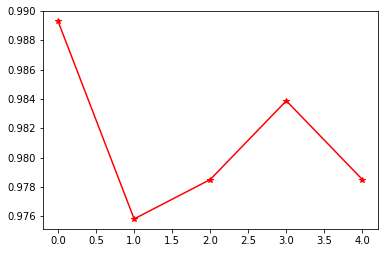

In [466]:
plt.plot(range(5),scores,marker = '*', color = 'r')

In [467]:
scores.mean()

0.9811942959001783

In [468]:
models.append('SVM')
value.append(scores.mean()*100)

#### K-fold Cross-validation for Decision Tree Classifier

In [469]:
model = tree.DecisionTreeClassifier(criterion = 'entropy')

In [470]:
scores = cross_val_score(model,train_data,train_label,cv=5)

In [471]:
scores

array([0.9973262, 1.       , 1.       , 1.       , 1.       ])

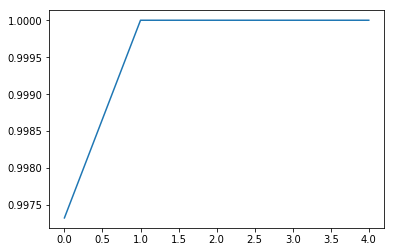

In [472]:
plt.plot(range(5),scores)

In [473]:
scores.mean()

0.9994652406417112

In [474]:
models.append('Decision Tree')
value.append(scores.mean()*100)

In [475]:
models

['SVM', 'Decision Tree']

In [476]:
value

[98.11942959001783, 99.94652406417111]

#### K-fold Cross-validation for Naive-Bayes Classifier

In [477]:
from sklearn.naive_bayes import GaussianNB

In [478]:
model = GaussianNB()

In [479]:
scores = cross_val_score(model,train_data,train_label,cv=5)

In [480]:
scores

array([0.84759358, 0.88978495, 0.87903226, 0.89247312, 0.85215054])

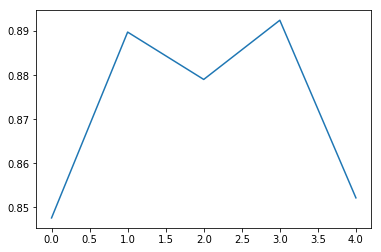

In [481]:
plt.plot(range(5),scores)

In [482]:
scores.mean()

0.872206888620551

In [483]:
models.append('Naive-Bayes')
value.append(scores.mean()*100)

In [484]:
models,value

(['SVM', 'Decision Tree', 'Naive-Bayes'],
 [98.11942959001783, 99.94652406417111, 87.2206888620551])

#### k-fold Cross-validation for k-nearest neighbour classifier

In [485]:
model = KNeighborsClassifier() 

In [486]:
scores = cross_val_score(model,train_data,train_label,cv=5)

In [487]:
scores

array([0.99197861, 0.99731183, 0.98655914, 0.99193548, 0.98655914])

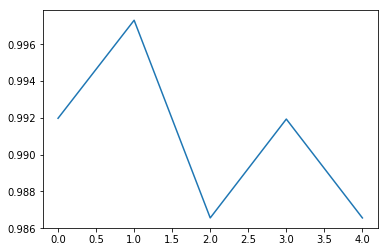

In [488]:
plt.plot(range(5),scores)

In [489]:
scores.mean()

0.9908688402047036

In [490]:
models.append('K-NN')
value.append(scores.mean()*100)

In [491]:
models,value

(['SVM', 'Decision Tree', 'Naive-Bayes', 'K-NN'],
 [98.11942959001783, 99.94652406417111, 87.2206888620551, 99.08688402047035])


#### K-fold Cross-validation for Random Forset Classifier 

In [492]:
model = RandomForestClassifier(criterion = 'entropy')

In [493]:
scores = cross_val_score(model,train_data,train_label,cv=5)

In [494]:
scores

array([1.        , 0.99731183, 1.        , 1.        , 1.        ])

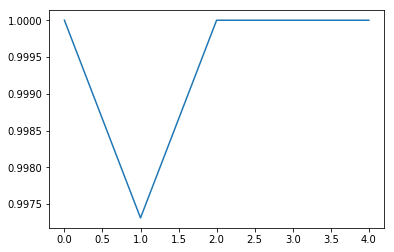

In [495]:
plt.plot(range(5),scores)

In [496]:
scores.mean()

0.9994623655913978

In [497]:
models.append('Random Forest')
value.append(scores.mean()*100)

In [498]:
models,value

(['SVM', 'Decision Tree', 'Naive-Bayes', 'K-NN', 'Random Forest'],
 [98.11942959001783,
  99.94652406417111,
  87.2206888620551,
  99.08688402047035,
  99.94623655913978])

#### K-fold Cross-validation for AdaBoost Classifier 

In [499]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini')
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 5000, learning_rate = 0.05, random_state = 42)

In [500]:
scores = cross_val_score(adabst,train_data,train_label,cv=5)

In [501]:
scores

array([0.99197861, 1.        , 1.        , 1.        , 1.        ])

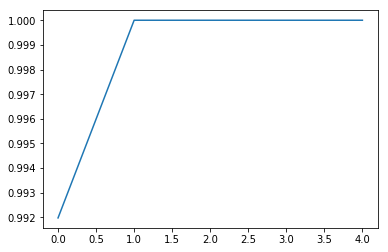

In [502]:
plt.plot(range(5),scores)

In [503]:
scores.mean()

0.9983957219251337

In [504]:
models.append('AdaBoost')
value.append(scores.mean()*100)

In [505]:
models,value

(['SVM', 'Decision Tree', 'Naive-Bayes', 'K-NN', 'Random Forest', 'AdaBoost'],
 [98.11942959001783,
  99.94652406417111,
  87.2206888620551,
  99.08688402047035,
  99.94623655913978,
  99.83957219251337])

### Comparison of diiferent classification models

In [506]:
models

['SVM', 'Decision Tree', 'Naive-Bayes', 'K-NN', 'Random Forest', 'AdaBoost']

In [507]:
value

[98.11942959001783,
 99.94652406417111,
 87.2206888620551,
 99.08688402047035,
 99.94623655913978,
 99.83957219251337]

In [508]:
type(models),type(value)

(list, list)

In [509]:
value = np.asarray(value)

In [510]:
x_label = np.arange(len(models))

Text(0.5,1,'Average accuracy chart of different classification models')

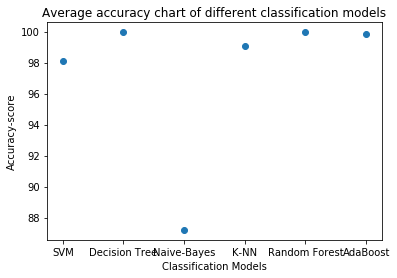

In [511]:
plt.scatter(x_label,value)
plt.xticks(x_label,models)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy-score')
plt.title('Average accuracy chart of different classification models')

Text(0.5,1,'Average accuracy chart of different classification models')

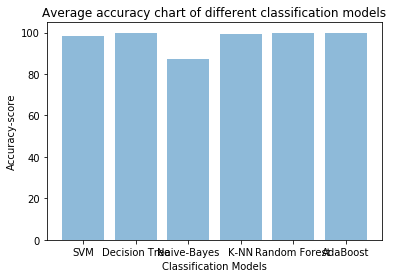

In [512]:
plt.bar(x_label,value,align = 'center', alpha = 0.5)
plt.xticks(x_label,models)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy-score')
plt.title('Average accuracy chart of different classification models')

Text(0.5,1,'Average accuracy chart of different classification models')

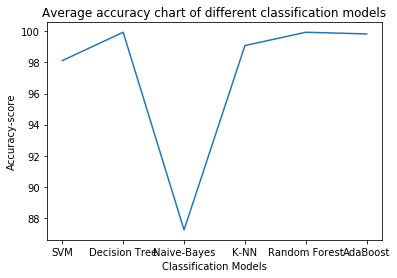

In [513]:
plt.plot(x_label,value)
plt.xticks(x_label,models)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy-score')
plt.title('Average accuracy chart of different classification models')

### Training And Testing

### Top 4 models are chosen by 5-fold cross-validation and that models are Support Vector Machine, Decision Tree, Random Forerst Classifier and Adaboost Classifier.

#### Support Vector Machine

In [514]:
model_svc = svm.SVC(kernel = 'linear',C=100,gamma=1)

In [515]:
model_svc.fit(train_data,train_label)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Decision Tree

In [516]:
model_dtree = tree.DecisionTreeClassifier(criterion = 'entropy')

In [517]:
model_dtree.fit(train_data,train_label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Random Forest Classifier

In [518]:
model_random = RandomForestClassifier(criterion = 'entropy')

In [519]:
model_random.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### AdaBoost Classifier

In [520]:
dtree = tree.DecisionTreeClassifier(min_samples_split = 10)
model_ada = AdaBoostClassifier(base_estimator = dtree, n_estimators = 5000, learning_rate = 0.005, random_state = 42)

In [521]:
model_ada.fit(train_data,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.005, n_estimators=5000, random_state=42)

#### Prediction using SVM , Decision Tree, Random Forest Classifier and AdaBoost Classifier

In [522]:
pred_svc = model_svc.predict(test_data)

In [523]:
pred_dtree = model_dtree.predict(test_data)

In [524]:
pred_random = model_random.predict(test_data)

In [525]:
pred_ada = model_ada.predict(test_data)

### Final Ensemble prediction using Maximum Voting

In [526]:
final_pred = np.array([])

In [527]:
len(test_data)

118

In [528]:
for i in range(0,len(test_data)):
    print(i)
    final_pred = np.append(final_pred,stats.mode([pred_svc[i],pred_dtree[i],pred_random[i],pred_ada[i]]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117


### Confusion Matrix

In [529]:
from sklearn.metrics import confusion_matrix

In [530]:
len(final_pred)

236

In [531]:
final_pred

array([1., 3., 0., 4., 0., 4., 3., 4., 3., 4., 0., 4., 0., 4., 0., 4., 3.,
       4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 2., 3., 0., 2., 0., 4.,
       0., 4., 0., 3., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 3., 0.,
       4., 2., 3., 1., 3., 0., 4., 0., 4., 1., 3., 0., 4., 0., 4., 0., 4.,
       0., 4., 0., 4., 0., 3., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0.,
       4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 3., 4., 0., 4., 0., 4.,
       0., 4., 0., 4., 0., 3., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0.,
       4., 0., 3., 0., 4., 0., 3., 0., 4., 0., 4., 0., 4., 1., 3., 0., 4.,
       0., 4., 0., 4., 0., 4., 0., 4., 0., 2., 0., 4., 0., 3., 1., 3., 0.,
       3., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4.,
       0., 4., 0., 4., 0., 4., 3., 4., 0., 4., 3., 4., 0., 4., 2., 3., 0.,
       4., 3., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 2., 3., 3., 4.,
       0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 3., 4., 3., 4., 0.,
       4., 0., 4., 0., 4.

In [532]:
prediction = final_pred.tolist()
prediction

[1.0,
 3.0,
 0.0,
 4.0,
 0.0,
 4.0,
 3.0,
 4.0,
 3.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 3.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 2.0,
 3.0,
 0.0,
 2.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 3.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 3.0,
 0.0,
 4.0,
 2.0,
 3.0,
 1.0,
 3.0,
 0.0,
 4.0,
 0.0,
 4.0,
 1.0,
 3.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 3.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 3.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 3.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 3.0,
 0.0,
 4.0,
 0.0,
 3.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 1.0,
 3.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 2.0,
 0.0,
 4.0,
 0.0,
 3.0,
 1.0,
 3.0,
 0.0,
 3.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0

In [533]:
type(prediction[0])

float

In [534]:
final = prediction[0:len(prediction)-1:2]

In [535]:
final

[1.0,
 0.0,
 0.0,
 3.0,
 3.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 3.0,
 0.0,
 2.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [536]:
for index, item in enumerate(final):
    final[index] = float(item)

In [537]:
len(test_label),len(final)

(118, 118)

In [538]:
result = confusion_matrix(test_label,final)

In [539]:
result

array([[95,  0,  0,  0],
       [ 4,  5,  0,  0],
       [ 0,  0,  4,  0],
       [ 0,  0,  0, 10]])

In [540]:
accuracy = accuracy_score(test_label,final)

In [541]:
accuracy

0.9661016949152542

In [542]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.61


In [543]:
from sklearn.metrics import classification_report

In [544]:
report = classification_report(test_label,final)

In [545]:
print(report)

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        95
          1       1.00      0.56      0.71         9
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00        10

avg / total       0.97      0.97      0.96       118

